# Load libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load data

In [25]:
data = pd.read_csv("token_datasets.csv")
data.head()

,Posts,label,tokenized_text,filtered_text,lemmatized_text
0,so my mum is textbook abusive but not often en...,Positive,"['so', 'my', 'mum', 'is', 'textbook', 'abusive...","['mum', 'textbook', 'abusive', 'often', 'enoug...","['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,hello i have never made a reddit post before b...,Depression/Suicidal Thoughts,"['hello', 'i', 'have', 'never', 'made', 'a', '...","['hello', 'never', 'made', 'reddit', 'post', '...","['hello', 'never', 'made', 'reddit', 'post', '..."
2,i m have tried to be nice to my parents and su...,Positive,"['i', 'm', 'have', 'tried', 'to', 'be', 'nice'...","['tried', 'nice', 'parents', 'support', 'years...","['tried', 'nice', 'parent', 'support', 'year',..."
3,i need some advice it will be a bit long but i...,Depression/Suicidal Thoughts,"['i', 'need', 'some', 'advice', 'it', 'will', ...","['need', 'advice', 'bit', 'long', 'necessary',...","['need', 'advice', 'bit', 'long', 'necessary',..."
4,hello im f from the ph with no close friends o...,Neutral,"['hello', 'im', 'f', 'from', 'the', 'ph', 'wit...","['hello', 'im', 'f', 'ph', 'close', 'friends',...","['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


In [26]:
data = data.drop(['Posts','tokenized_text','filtered_text'], axis=1)
data.head()

,label,lemmatized_text
0,Positive,"['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,Depression/Suicidal Thoughts,"['hello', 'never', 'made', 'reddit', 'post', '..."
2,Positive,"['tried', 'nice', 'parent', 'support', 'year',..."
3,Depression/Suicidal Thoughts,"['need', 'advice', 'bit', 'long', 'necessary',..."
4,Neutral,"['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


# Word Vectorization

In [27]:
vectorizer = CountVectorizer()
vec_transformed = vectorizer.fit_transform(data.lemmatized_text)
DocTermMatrix = pd.DataFrame(vec_transformed.toarray(), columns=vectorizer.get_feature_names_out())
DocTermMatrix.head()

,aaaaa,aaaand,aaahhhhhh,aaron,ab,aba,aback,abandon,abandoned,abandoning,...,zoim,zombie,zomble,zone,zoned,zoning,zoo,zookeepers,zoom,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Label re-encoding

In [28]:
labelling = data.iloc[:,0]
labelling.head(10)

0                        Positive
1    Depression/Suicidal Thoughts
2                        Positive
3    Depression/Suicidal Thoughts
4                         Neutral
5                        Positive
6                         Neutral
7                        Positive
8                        Positive
9                        Positive
Name: label, dtype: object

In [29]:
labelEncoder = LabelEncoder()
labelling_transformed = labelEncoder.fit_transform(labelling)

In [30]:
labelling_transformed[:10]

array([2, 0, 2, 0, 1, 2, 1, 2, 2, 2])

In [31]:
list(labelEncoder.classes_)

['Depression/Suicidal Thoughts', 'Neutral', 'Positive']

# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(DocTermMatrix, labelling_transformed,
                                                    test_size=1/3, random_state=42)

In [33]:
unique_values, counts = np.unique(y_train, return_counts=True)

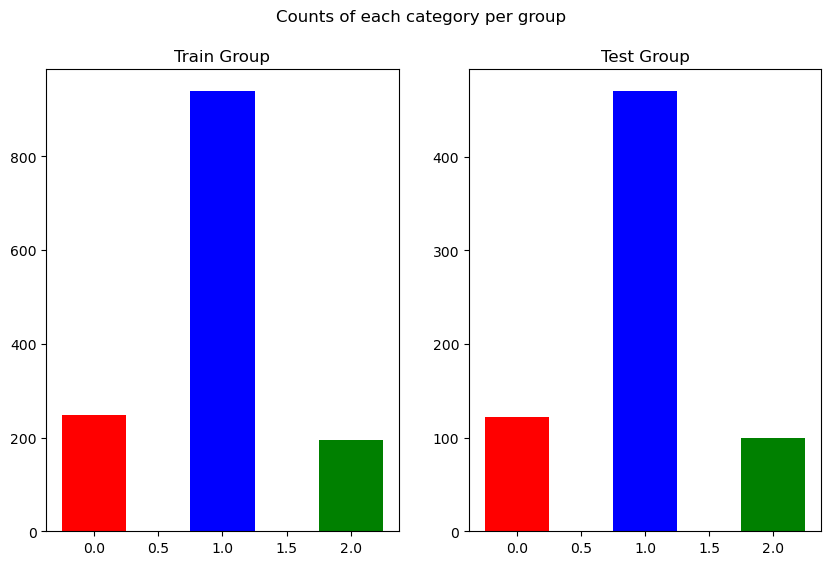

In [34]:
plt.figure(figsize=(10,6))
plt.suptitle("Counts of each category per group")
plt.subplot(121)
unique_values, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Train Group")

plt.subplot(122)
unique_values, counts = np.unique(y_test, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Test Group")

plt.show()

## Save the data groups

In [16]:
X_train.to_csv('X_train.csv', sep=',', header=True, index=False)
X_test.to_csv('X_test.csv', sep=',', header=True, index=False)
y_train.tofile('y_train.csv', sep=',')
y_test.tofile('y_test.csv', sep=',')

# Model Training

## Load files

In [35]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = np.loadtxt('y_train.csv', delimiter=',', dtype=int)
y_test = np.loadtxt('y_test.csv', delimiter=',', dtype=int)

## Building the models

### Logistic Regression

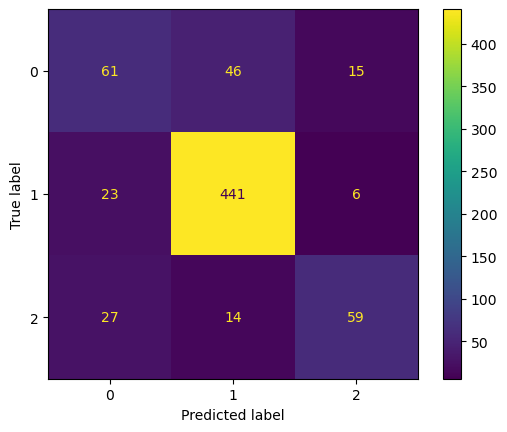

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



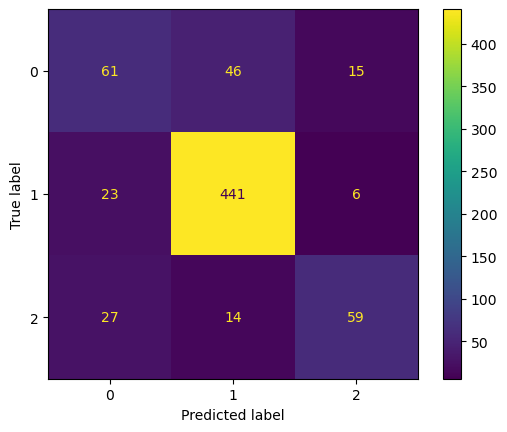

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



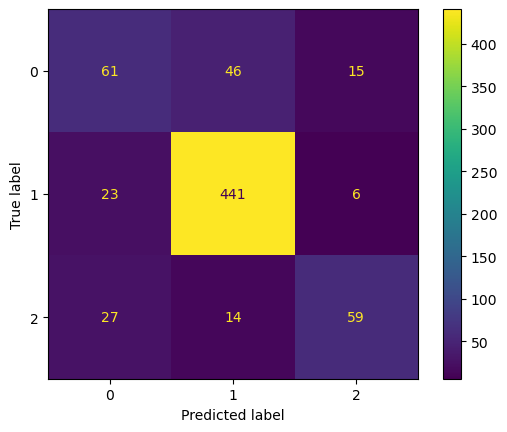

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



In [44]:
max_iter = [100, 500, 3000]

for iter in max_iter:
    # Building the model
    LogRegModel = LogisticRegression(max_iter=iter, random_state=0)
    LogRegModel.fit(X_train, y_train)
    LogReg_pred = LogRegModel.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, LogReg_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2])
    cm_display.plot()
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, LogReg_pred))
    print(classification_report(y_test, LogReg_pred))

### kNN

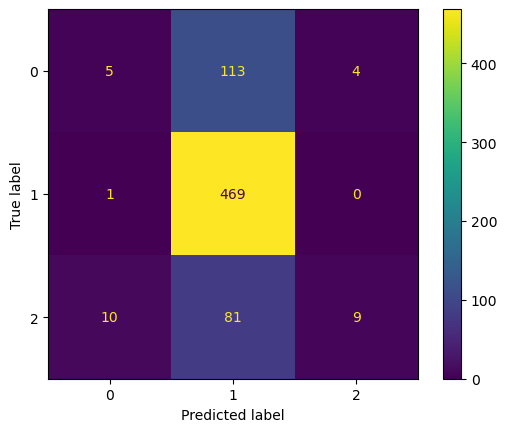

Accuracy:  0.6979768786127167
              precision    recall  f1-score   support

           0       0.31      0.04      0.07       122
           1       0.71      1.00      0.83       470
           2       0.69      0.09      0.16       100

    accuracy                           0.70       692
   macro avg       0.57      0.38      0.35       692
weighted avg       0.64      0.70      0.60       692



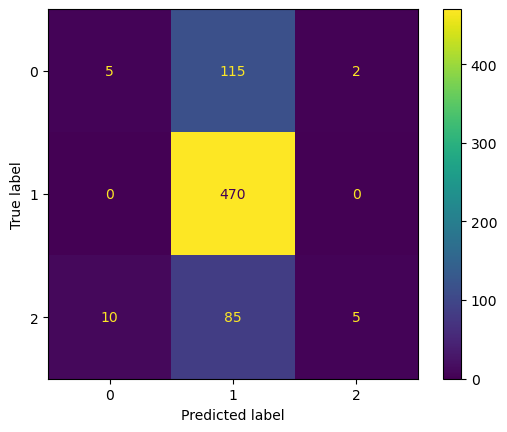

Accuracy:  0.6936416184971098
              precision    recall  f1-score   support

           0       0.33      0.04      0.07       122
           1       0.70      1.00      0.82       470
           2       0.71      0.05      0.09       100

    accuracy                           0.69       692
   macro avg       0.58      0.36      0.33       692
weighted avg       0.64      0.69      0.59       692



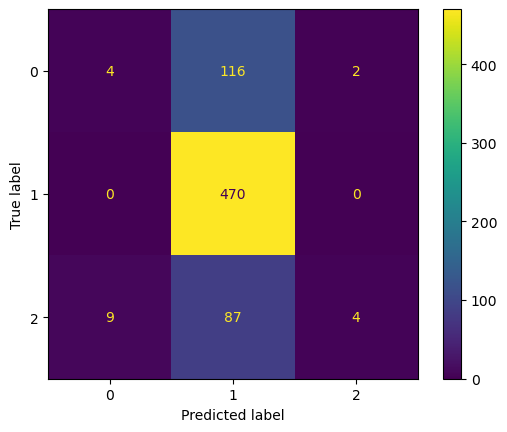

Accuracy:  0.6907514450867052
              precision    recall  f1-score   support

           0       0.31      0.03      0.06       122
           1       0.70      1.00      0.82       470
           2       0.67      0.04      0.08       100

    accuracy                           0.69       692
   macro avg       0.56      0.36      0.32       692
weighted avg       0.62      0.69      0.58       692



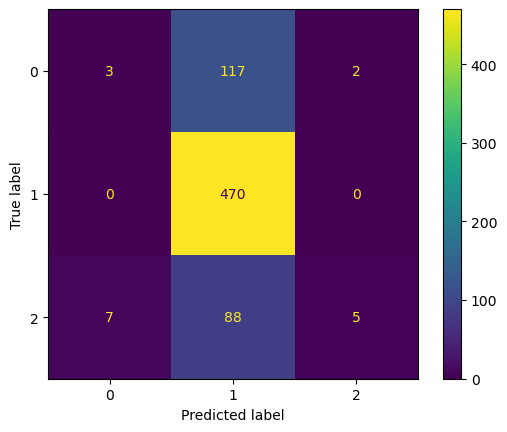

Accuracy:  0.6907514450867052
              precision    recall  f1-score   support

           0       0.30      0.02      0.05       122
           1       0.70      1.00      0.82       470
           2       0.71      0.05      0.09       100

    accuracy                           0.69       692
   macro avg       0.57      0.36      0.32       692
weighted avg       0.63      0.69      0.58       692



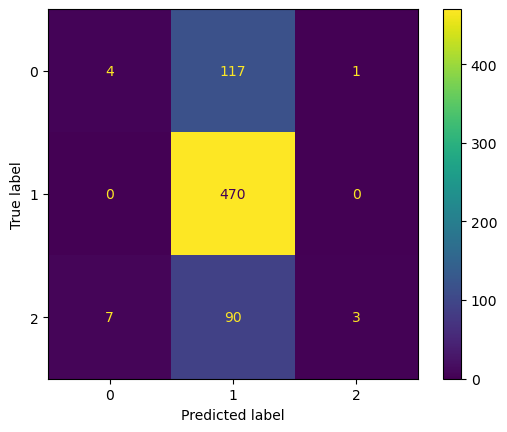

Accuracy:  0.6893063583815029
              precision    recall  f1-score   support

           0       0.36      0.03      0.06       122
           1       0.69      1.00      0.82       470
           2       0.75      0.03      0.06       100

    accuracy                           0.69       692
   macro avg       0.60      0.35      0.31       692
weighted avg       0.64      0.69      0.58       692



In [45]:
neighbors = [10, 30, 80, 100, 150]

for neighbor in neighbors:
    # Build the model
    kNN_model = KNeighborsClassifier(n_neighbors=neighbor)
    kNN_model.fit(X_train, y_train)
    kNN_pred = kNN_model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, kNN_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2])
    cm_display.plot()
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, kNN_pred))
    print(classification_report(y_test, kNN_pred))

### Gaussian Naive Bayes

In [ ]:
max_iter = [100, 500, 3000]

for iter in max_iter:
    # Build the model
    LogRegModel = LogisticRegression(max_iter=iter, random_state=0)
    LogRegModel.fit(X_train, y_train)
    LogReg_pred = LogRegModel.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, LogReg_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2])
    cm_display.plot()
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, LogReg_pred))
    print(classification_report(y_test, LogReg_pred))

### Random Forest

In [ ]:
max_iter = [100, 500, 3000]

for iter in max_iter:
    # Building the model
    LogRegModel = LogisticRegression(max_iter=iter, random_state=0)
    LogRegModel.fit(X_train, y_train)
    LogReg_pred = LogRegModel.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, LogReg_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2])
    cm_display.plot()
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, LogReg_pred))
    print(classification_report(y_test, LogReg_pred))